## AI / ML PROJECT - PREMIER LEAGUE PREDICTIONS

IEESP - Sean Kelly X00221555 | David Burgos X00229142 | Daniel Alonso X00226363

## 1. Dataset
The dataset we have chosen is one that we have put together ourselves based from three different sources, which include https://native-stats.org/ , https://www.kaggle.com/datasets/filippomonte/premier-league-past-3-seasons and https://www.kaggle.com/datasets/filippomonte/premier-league-past-3-seasons . 

Our dataset has 22 columns and 3421 rows. It is useful for Sports fans, Bettors and potentially people involved in the league.

Some key columns are **Full time result(FTR), Full time away goals(FTAG) and Red cards(HR)(AR)**. 

## Objective

Our objective is to attempt to provide statistics on teams in the Premier League and to create a prediction model of the result (W/D/L) of two teams playing each other based on past statistics.

This model can be used to help make bets with friends, decide what team to follow, decide what games to attend and more.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import joblib
from pathlib import Path

In [32]:
def load_league_data():
    url = 'https://raw.githubusercontent.com/SDKELLY06/AI-ML-PROJECT/refs/heads/main/AIML_excel.csv'
    csv_path = Path("Premier League.csv")

    if not csv_path.exists():
        filename = pd.read_csv(url)
        filename.to_csv(csv_path, index=False)
    else:
        filename = pd.read_csv(csv_path)

    return filename

league = load_league_data()

print("\n")
filename = "Premier League.csv"
data = np.genfromtxt(filename, delimiter=',')
print("Data shape:", data.shape)
league.head()



Data shape: (3421, 22)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2024,Man United,Fulham,1,0,H,0,0,D,R Jones,...,5,2,12,10,7,8,2,3,0,0
1,17/08/2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,...,2,5,9,18,2,10,3,1,0,0
2,17/08/2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,...,6,3,17,14,8,2,2,2,0,0
3,17/08/2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,...,1,5,8,8,1,5,1,1,1,0
4,17/08/2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,...,1,4,15,16,3,12,2,4,1,0


## Statistics: 

In [33]:
league.info

<bound method DataFrame.info of             Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0     16/08/2024   Man United          Fulham     1     0   H     0     0   D   
1     17/08/2024      Ipswich       Liverpool     0     2   A     0     0   D   
2     17/08/2024      Arsenal          Wolves     2     0   H     1     0   H   
3     17/08/2024      Everton        Brighton     0     3   A     0     1   A   
4     17/08/2024    Newcastle     Southampton     1     0   H     1     0   H   
...          ...          ...             ...   ...   ...  ..   ...   ...  ..   
3415  21/05/2017    Liverpool   Middlesbrough     3     0   H     1     0   H   
3416  21/05/2017   Man United  Crystal Palace     2     0   H     2     0   H   
3417  21/05/2017  Southampton           Stoke     0     1   A     0     0   D   
3418  21/05/2017      Swansea       West Brom     2     1   H     0     1   A   
3419  21/05/2017      Watford        Man City     0     5   A     0     4   A

1. Here we see listed amounts of how many goals were scored by home and away teams, aswell as altogether. Asides from the team names, This is the most important statistic of the dataset as goals are what wins games.

In [34]:
league["FTHG"].value_counts()


FTHG
1    1093
2     813
0     790
3     427
4     195
5      76
6      17
7       6
9       2
8       1
Name: count, dtype: int64

In [35]:
league["FTAG"].value_counts()

FTAG
1    1135
0    1042
2     731
3     327
4     128
5      41
6      12
7       2
8       1
9       1
Name: count, dtype: int64

In [36]:
print(league["FTHG"].value_counts() + league["FTAG"].value_counts())

0    1832
1    2228
2    1544
3     754
4     323
5     117
6      29
7       8
8       2
9       3
Name: count, dtype: int64


2. This show's us important figures of each column, some in which are specifically important are std(Standard Deviation), mean and max.

In [37]:
league.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,1.558480,1.285965,0.698538,0.571637,13.870175,11.516082,4.797661,4.040351,10.592105,10.854678,5.694444,4.697076,1.655556,1.824269,0.054386,0.061988
std,1.328398,1.220658,0.855140,0.783989,5.762237,5.110768,2.655846,2.388455,3.449378,3.581042,3.094102,2.801838,1.276402,1.308888,0.235665,0.247159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,5.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,37.000000,37.000000,17.000000,15.000000,24.000000,26.000000,19.000000,19.000000,7.000000,8.000000,2.000000,2.000000


## Dataset Cleaning and Wrangling


<function matplotlib.pyplot.show(close=None, block=None)>

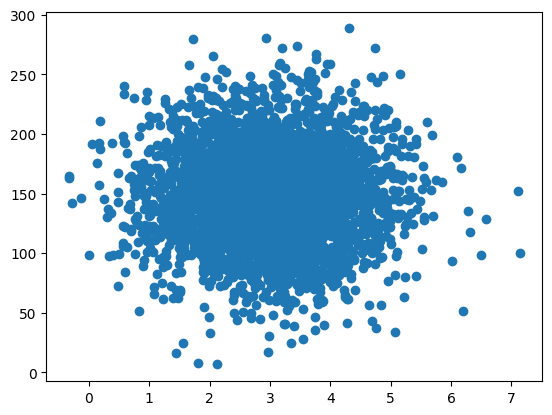

In [38]:
np.random.seed(2)

X = np.random.normal(3,1,3421)
Y = np.random.normal(150, 40, 3421)

plt.scatter(X, Y)
plt.show


In [39]:
def shuffle_and_split_data(data, test_ratio):
   np.random.seed(42)
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(league, 0.2)
len(train_set)

len(test_set)


test = shuffle_and_split_data
print(test)
print("\n")
train_set, test_set = train_test_split(league, test_size=0.2, random_state=42)

print("Test set size:", len(test_set))
print("Train set size:", len(train_set))
test_set["HTAG"].isnull().sum()

<function shuffle_and_split_data at 0x129085e40>


Test set size: 684
Train set size: 2736


np.int64(0)